### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList


In [2]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='stibniteMine',maxRef = 500, multiplier=1.5)

#Define base refinement and refinement levels
# vorMesh.defineParameters(maxRef = 500, multiplier=2.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/stibniteMine/Shp/catchment_11N.shp')
vorMesh.addLayer('water','../../examples/stibniteMine/Shp/river_basin_11N.shp',50)
vorMesh.addLayer('pit','../../examples/stibniteMine/Shp/minePits_11N.shp',50)
vorMesh.addLayer('dump','../../examples/stibniteMine/Shp/mineDumps_11N.shp',50)
vorMesh.addLayer('faults','../../examples/stibniteMine/Shp/faults.shp',50)

In [3]:
#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()


/--------Layer water discretization-------/
Progressive cell size list: [50, 125.0, 237.5, 406.25] m.

/--------Layer pit discretization-------/
Progressive cell size list: [50, 125.0, 237.5, 406.25] m.

/--------Layer dump discretization-------/
Progressive cell size list: [50, 125.0, 237.5, 406.25] m.

/--------Layer faults discretization-------/
Progressive cell size list: [50, 125.0, 237.5, 406.25] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 4
Points from layer buffers: 5997
Points from max refinement areas: 324
Points from min refinement areas: 251
Total points inside the limit: 8880
/--------------------------------------------/

Time required for point generation: 6.12 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 4.33 seconds 



In [4]:
#Export generated voronoi mesh
vorMesh.getVoronoiAsShp(outputPath='output')


/----Generation of the voronoi shapefile----/
The output folder output exists

Time required for voronoi shapefile: 4.76 seconds 



In [5]:
#Export point data and voronoi polygons

outPath = 'output'
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

#vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


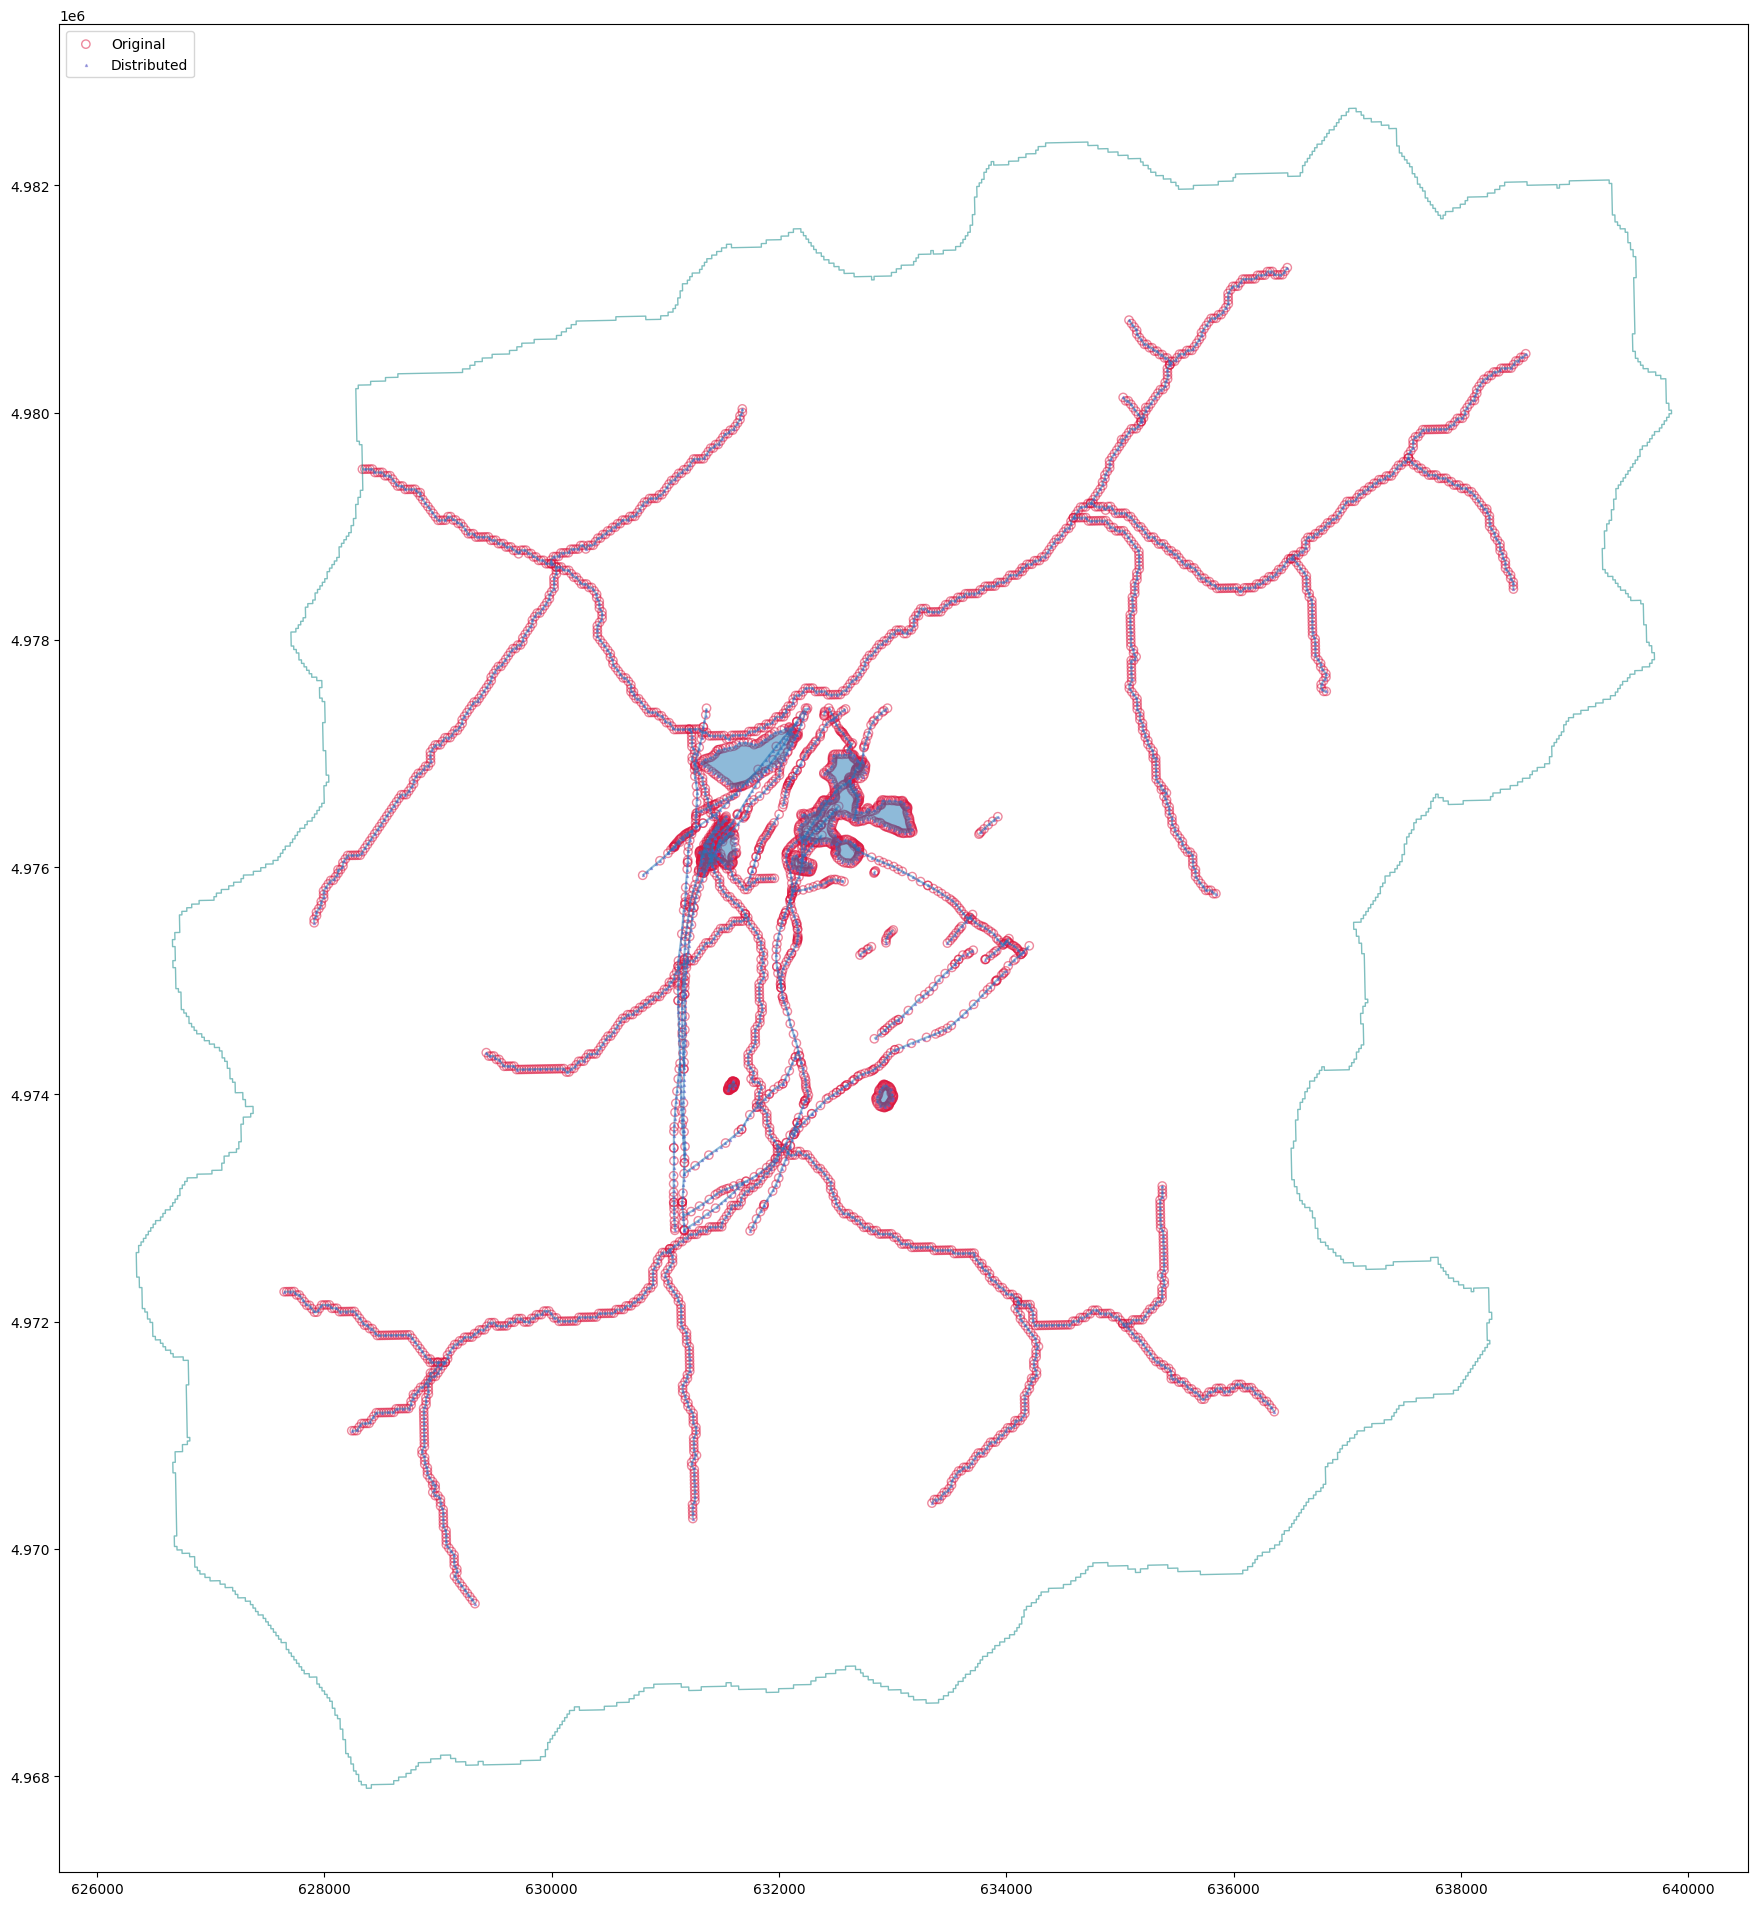

In [6]:
plotOrgDistPoints(vorMesh)


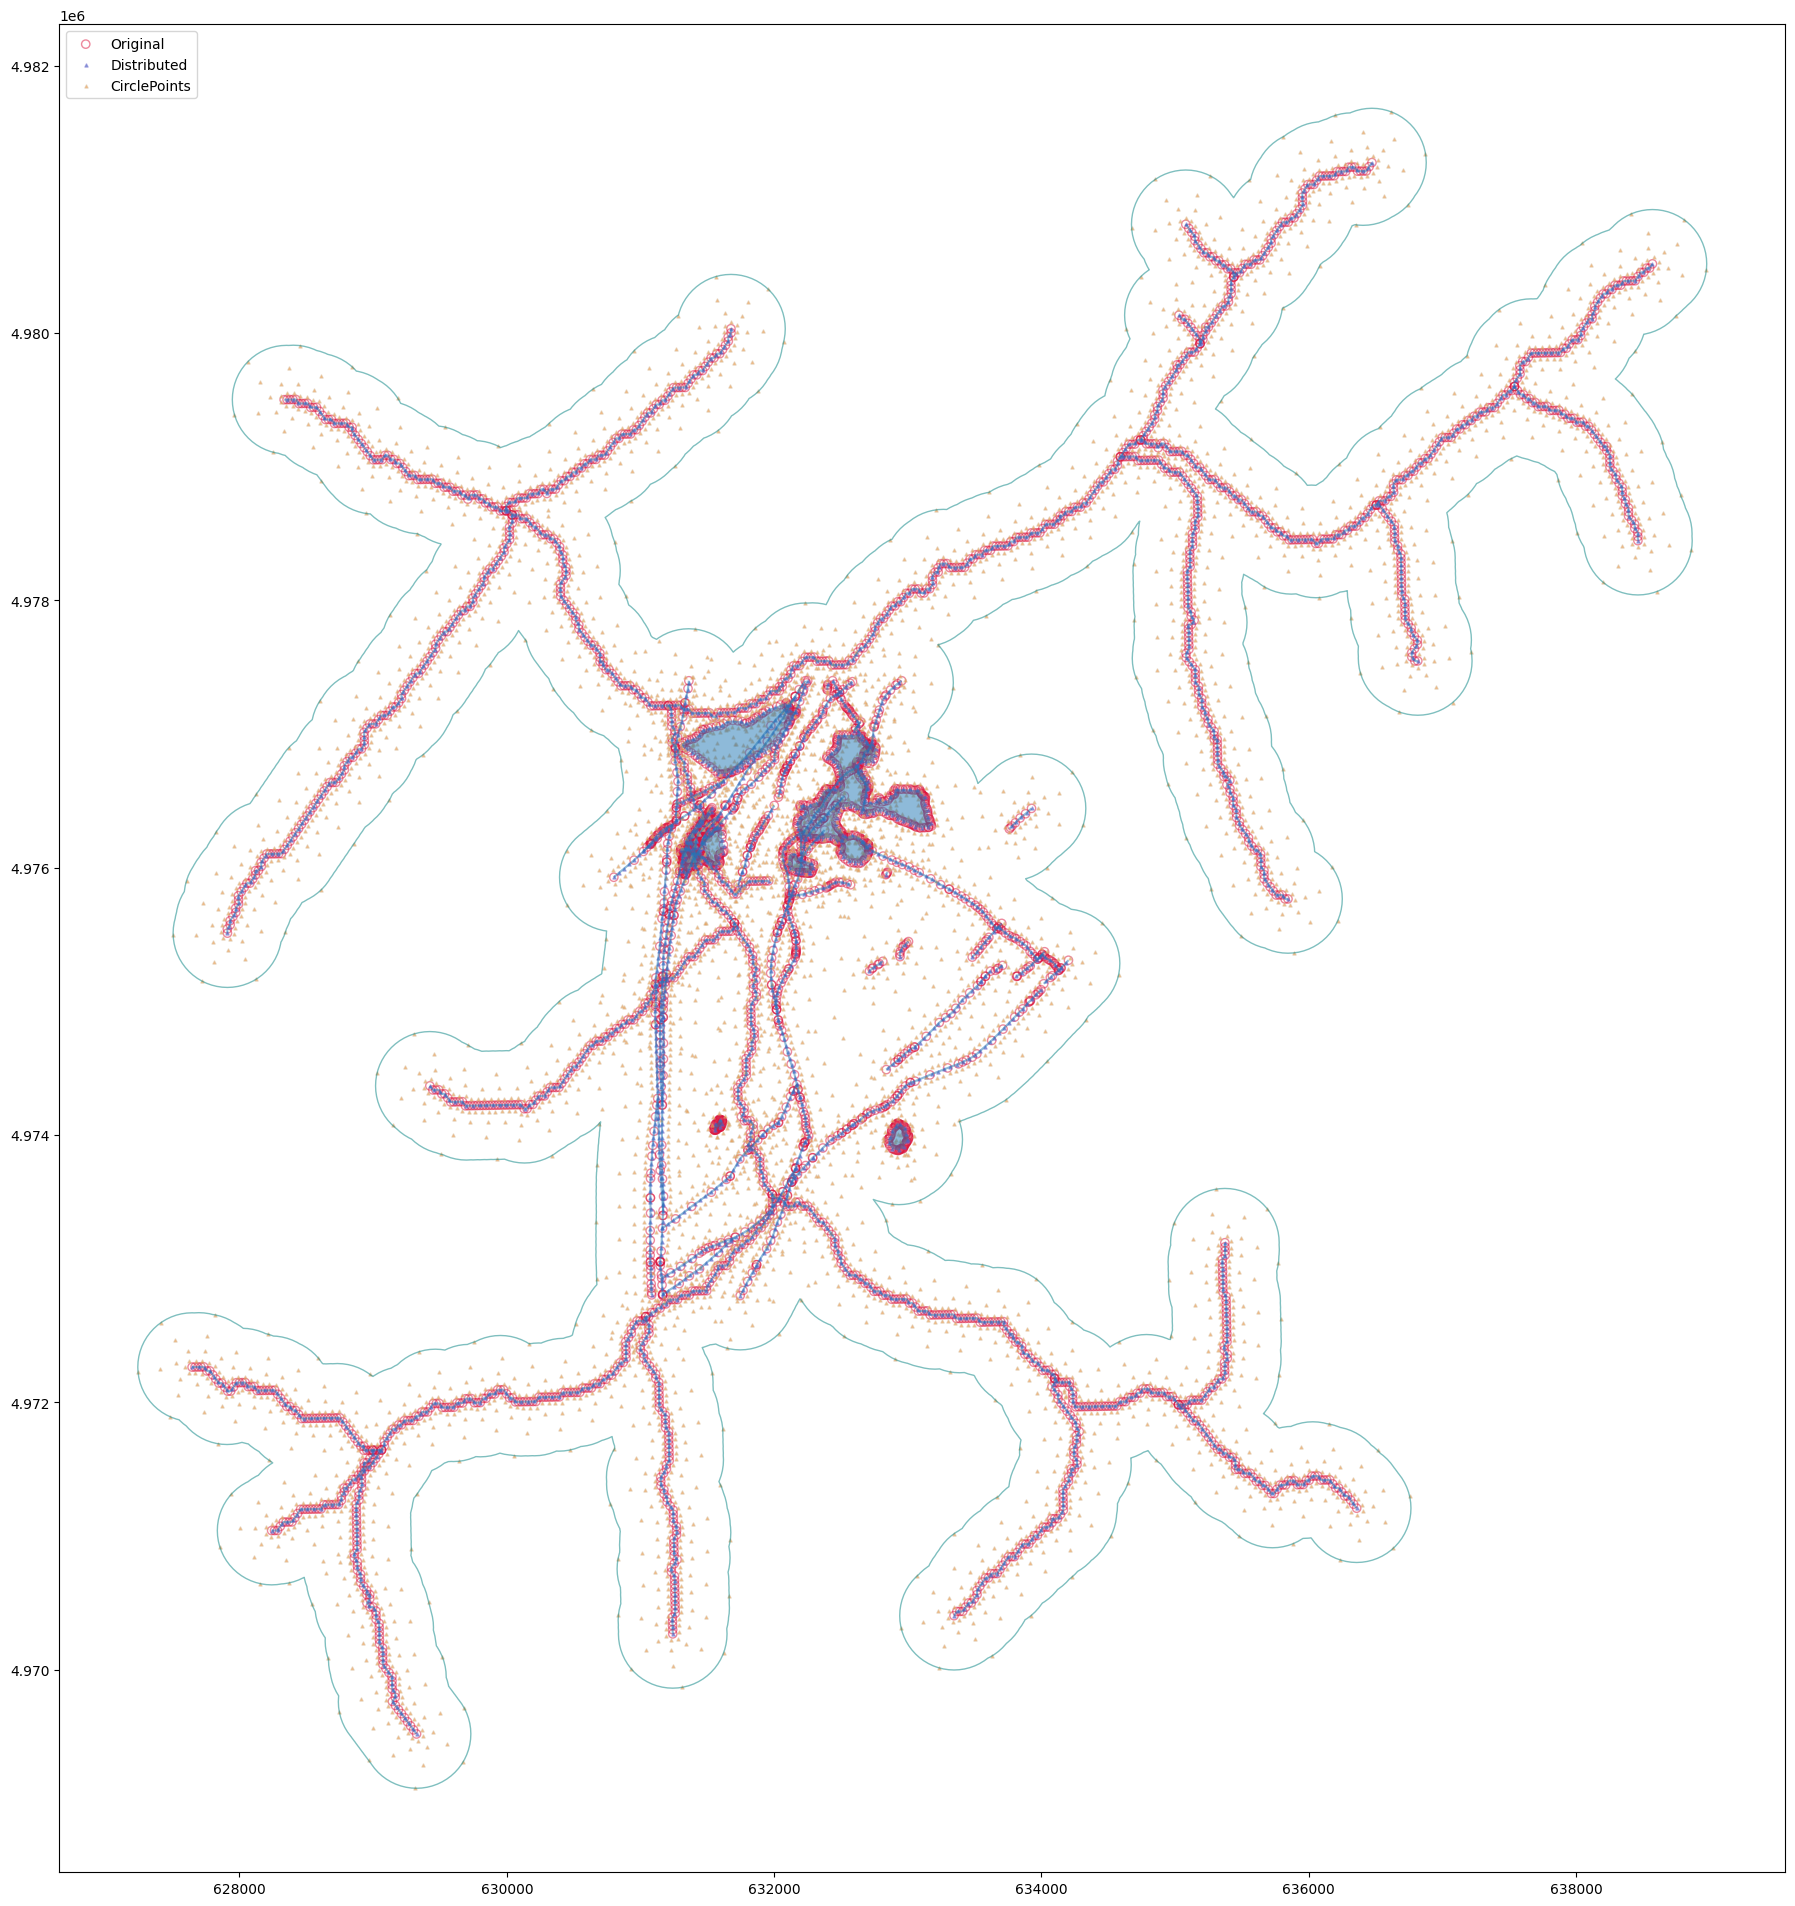

In [7]:
plotCirclesPoints(vorMesh)

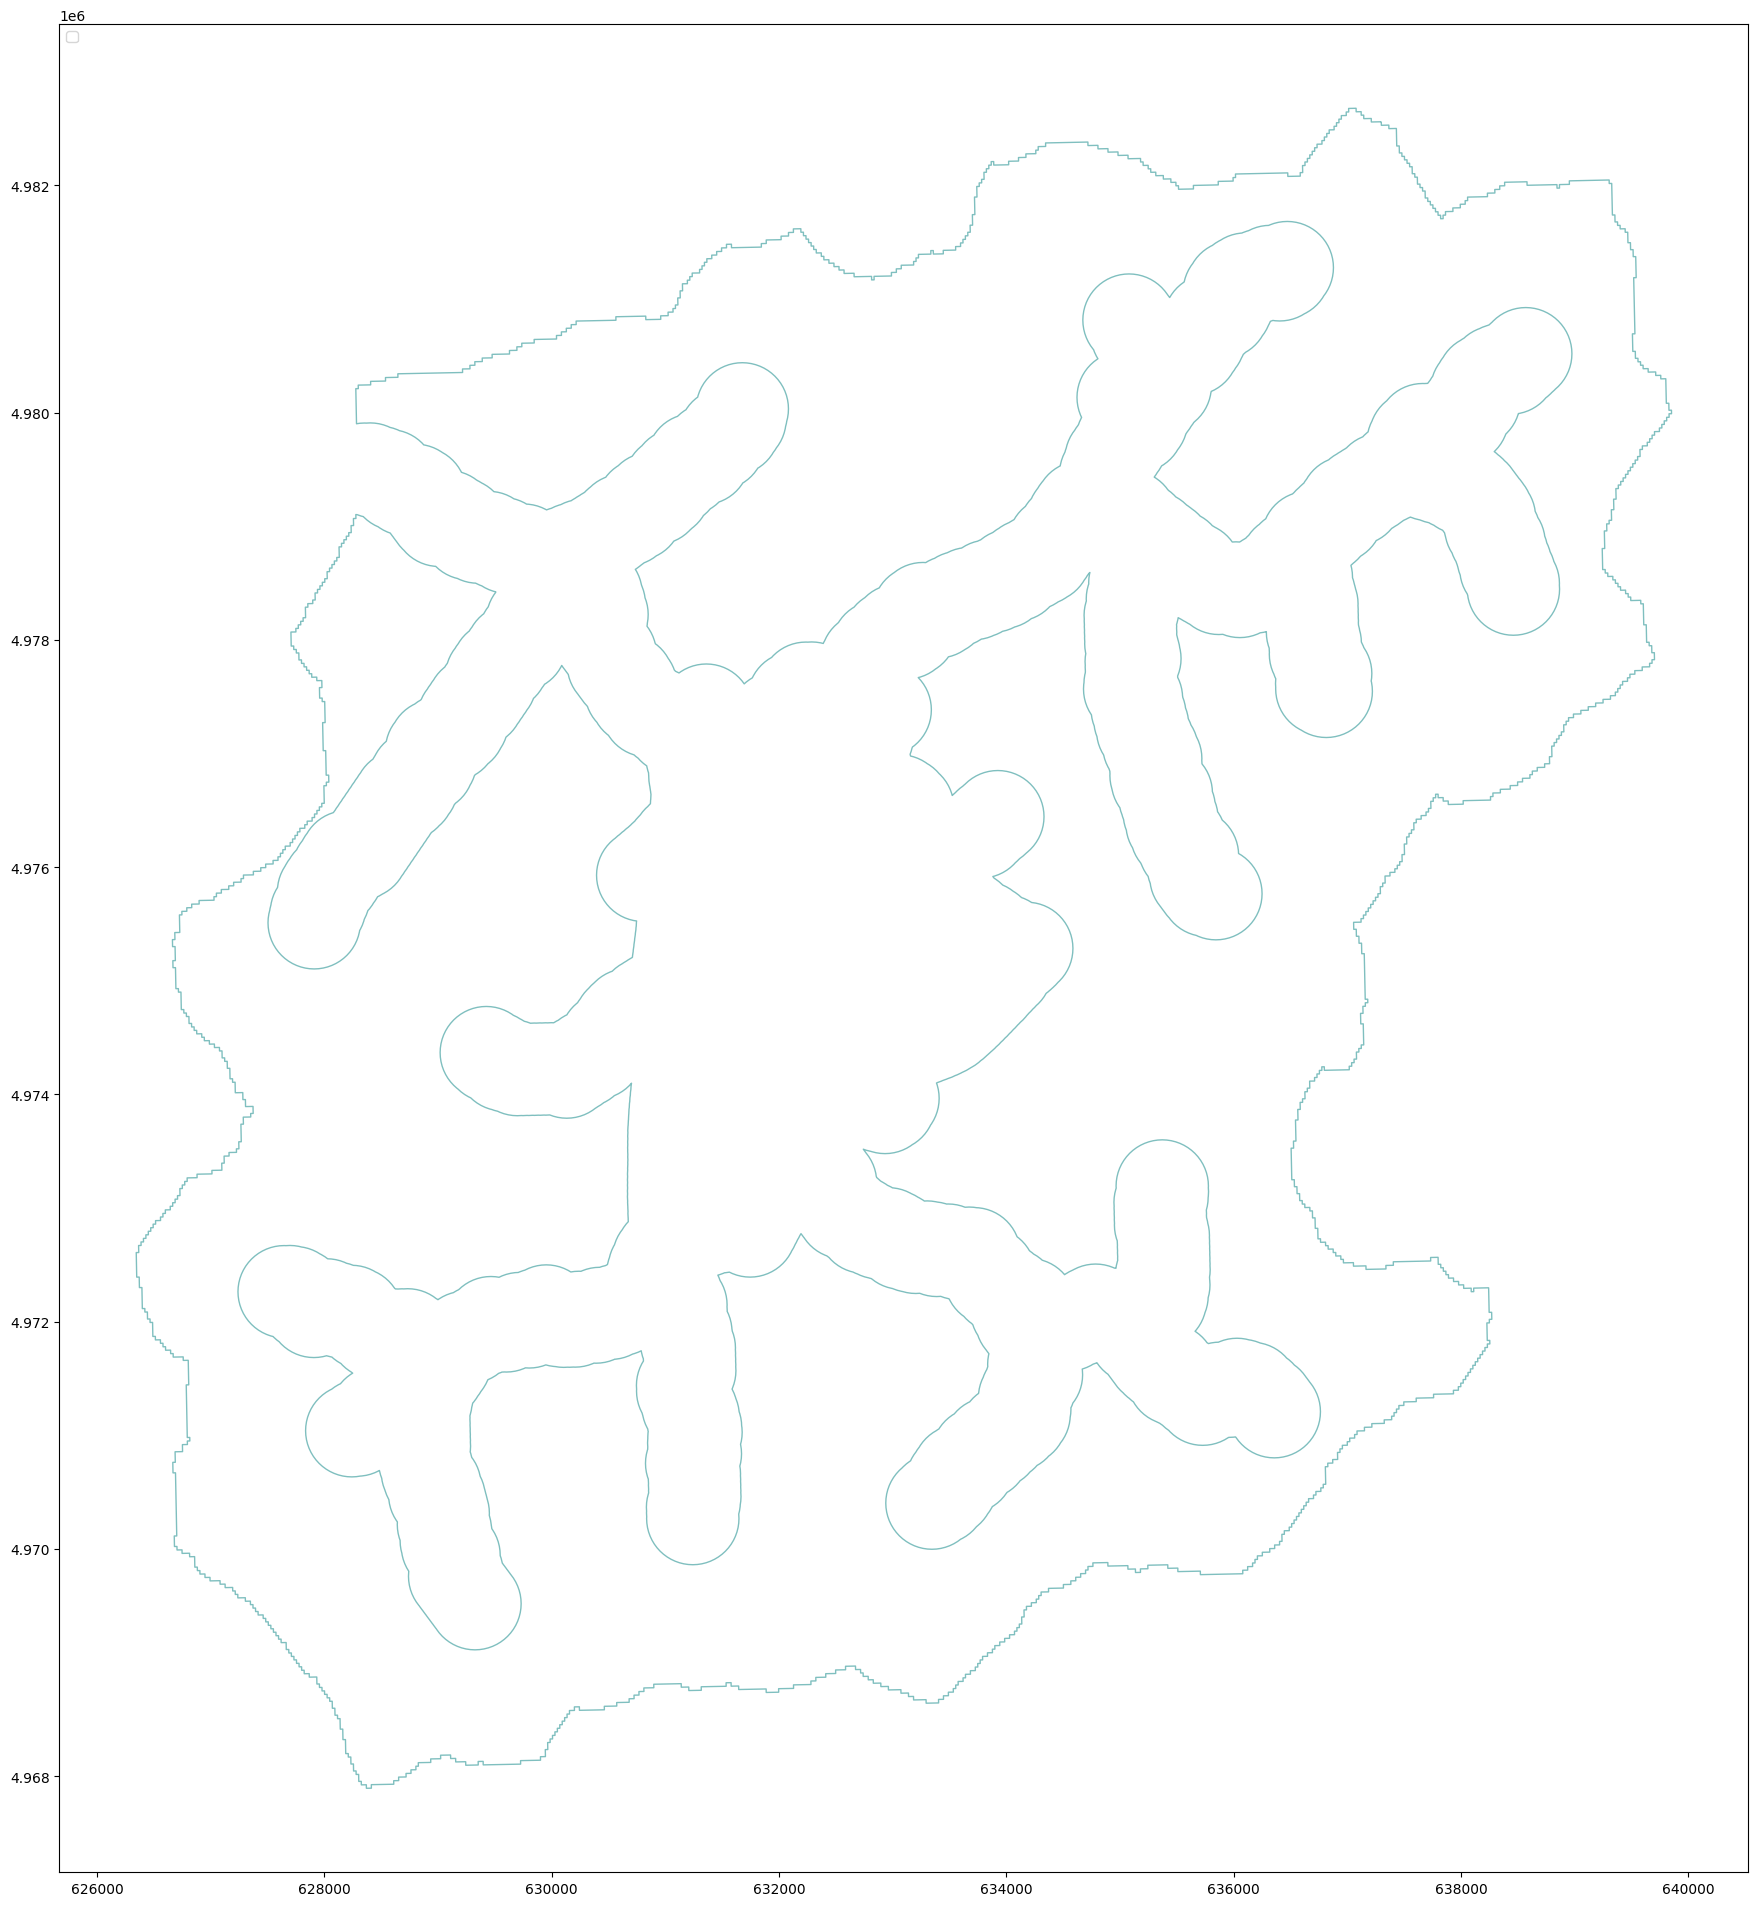

In [8]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

<Axes: >

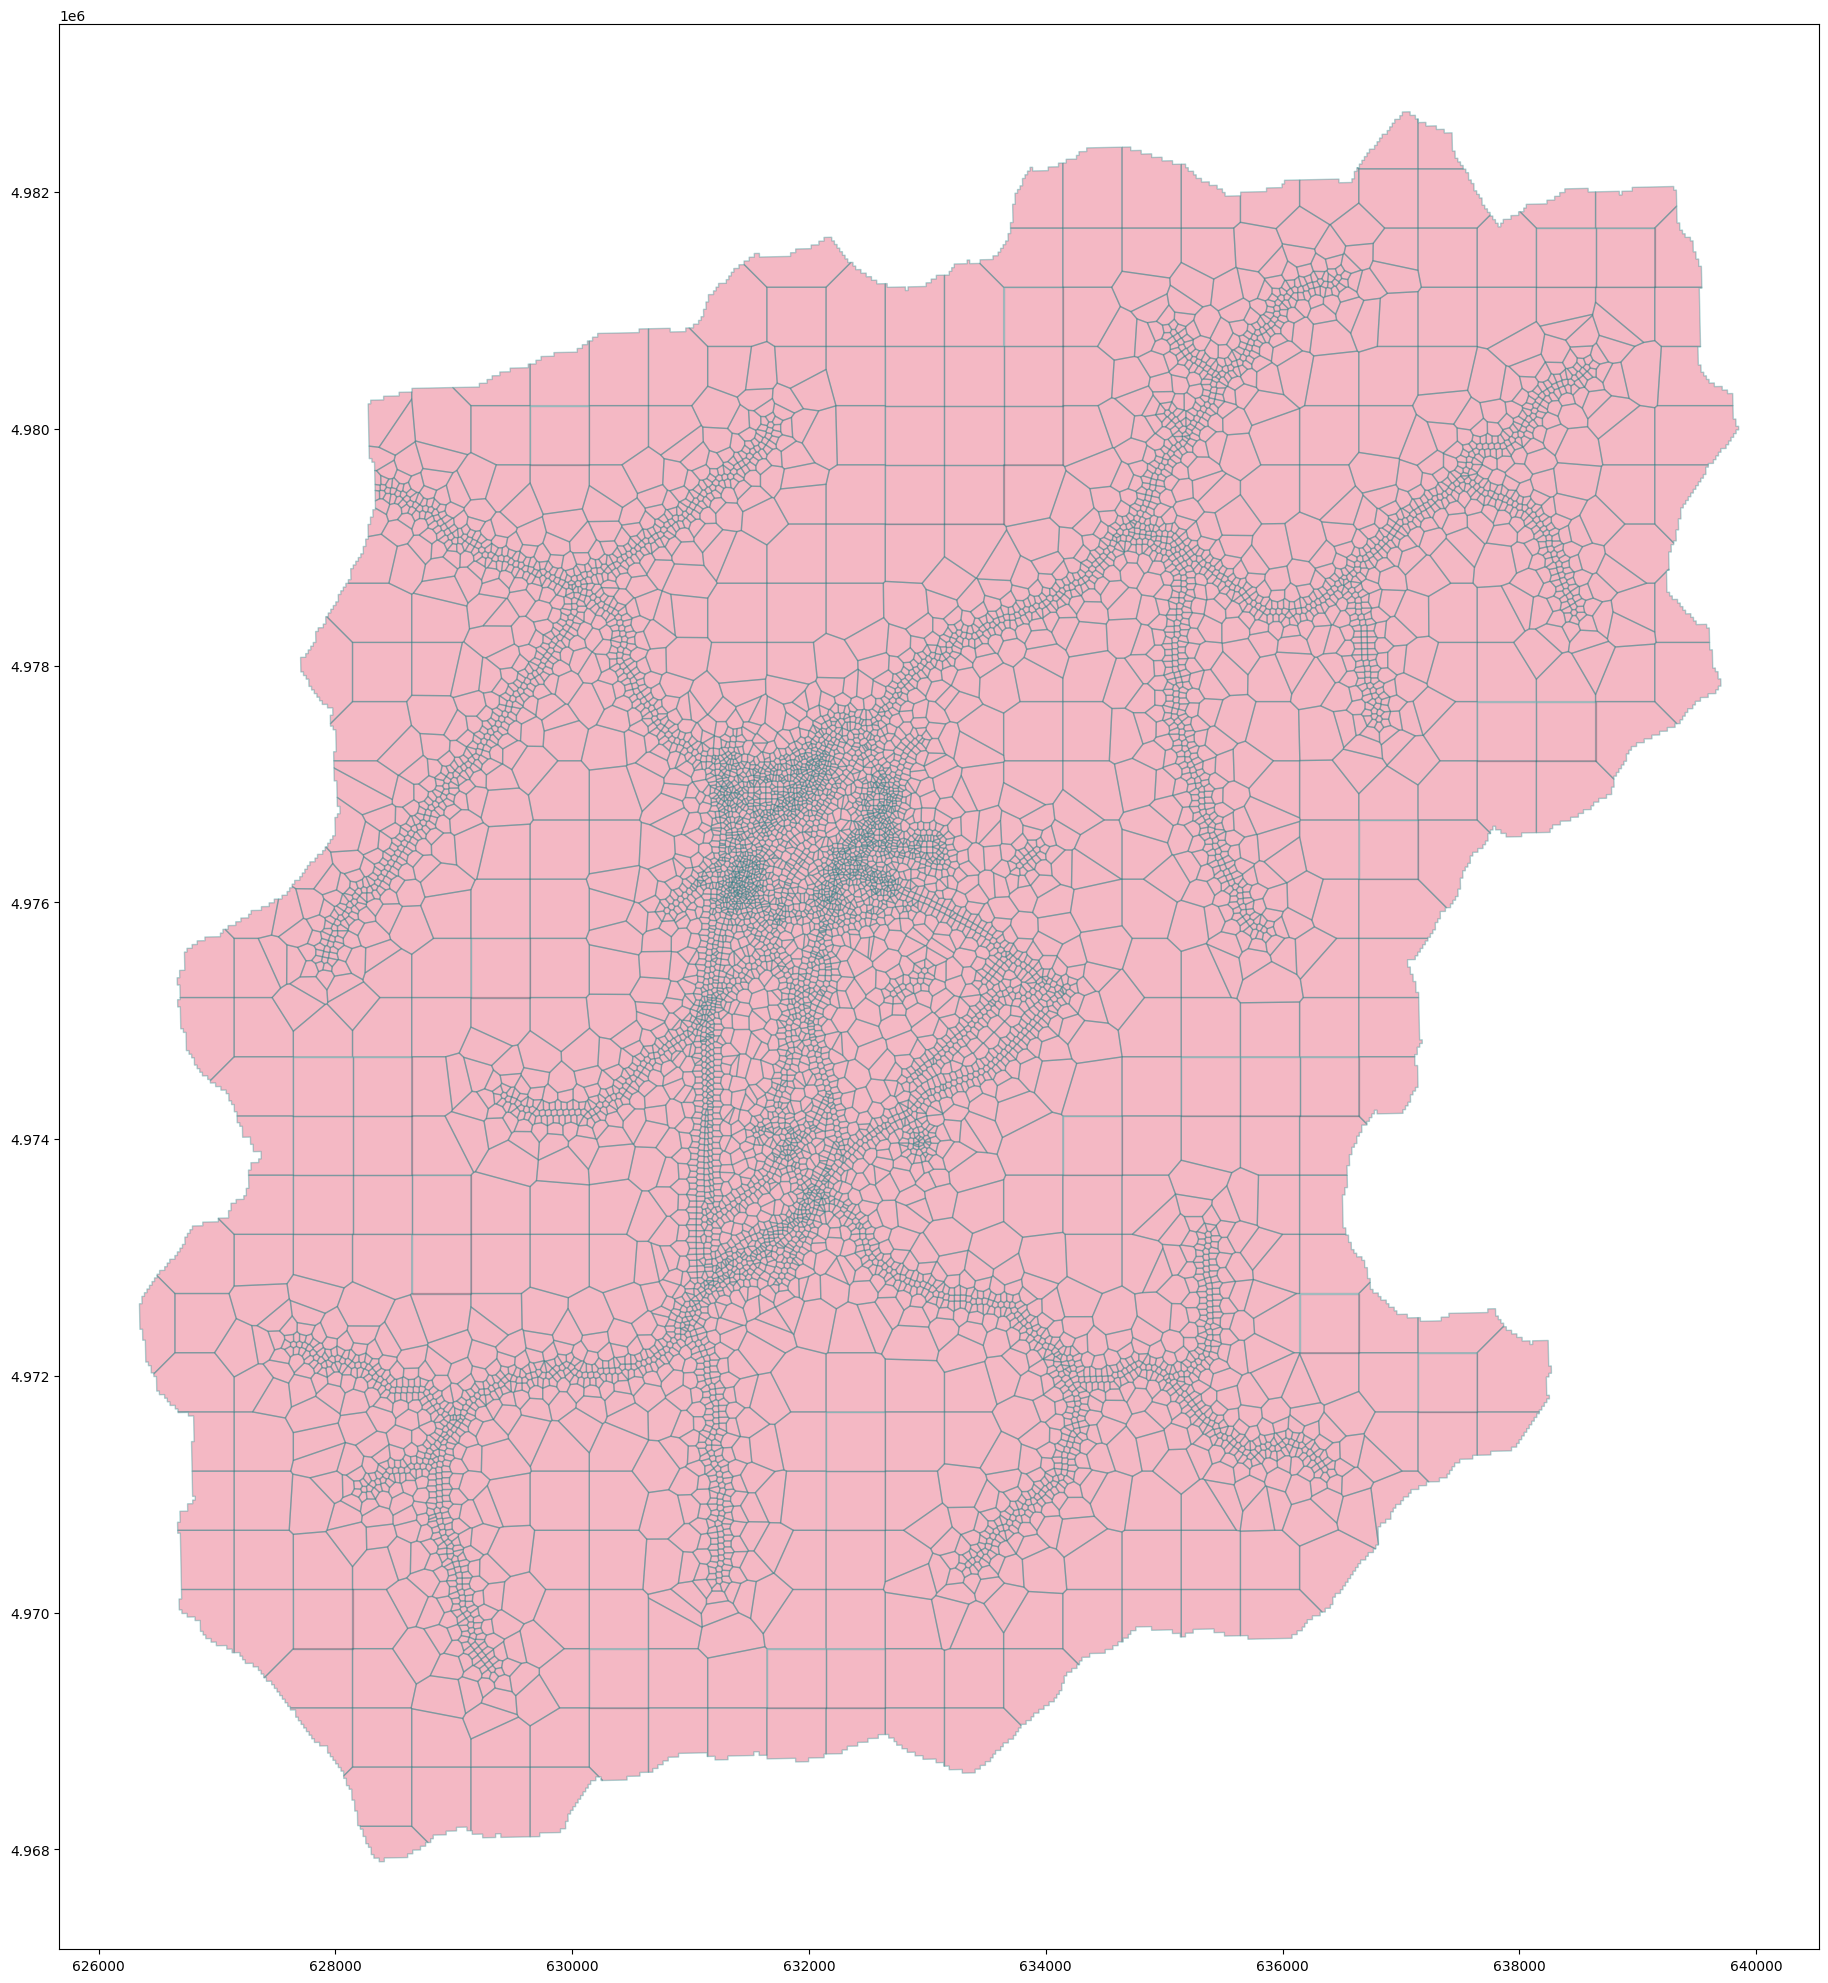

In [9]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')